## Importações

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import markdown

## Parâmetros

In [2]:
k = 0.5  # Condutividade Térmica
L = 1.0  # Tamanho do intervalo
T = 1  # Intervalo de tampo
Nx = 70  # Numero de pontos na partição de x
Nt = 5000  # Numero de pontos na partição de t
Hx = L / (Nx - 1)  # Espaçamento de x
Ht = T / Nt  # espaçamento de t

## Criando a matriz de $x \times t $

In [3]:
# inicia como tudo = 0
u = np.zeros((Nx, Nt))
# x é o intervalo de 0 a 1 com Nx pontos na partição
x = np.linspace(0, 1, Nx)

## Condições inicial e de contorno

In [4]:
u[:, 0] = x * (x-1) ** 2 # Distribuição inicial
u[0, :] = 0.0  # Valor da esquerda
u[Nx - 1, :] = 0.0  # Valor da direita

## Diferenças finitas

Vamos usar o método das diferenças finitas para calcular a segunda derivada de u em função de x, $u_{xx}$. Para isso, usamos a definição da derivada:

$$u_x = \lim_{h \to 0} \frac{(u(x + h) - f(x))}{h} \approx  \frac{(u(x + h) - f(x))}{h} $$

que é a diferença adiantada. Para a segunda derivada, vamos simplesmente derivar a própria derivada, aproximando novamente pela diferença finita adiantada: 

$$u_{xx} = \frac{u_x(x+h) - u_x(x)}{h} = \frac{u(x+2h) - 2u(x+h)+u(x)}{h^2} $$

A equação do calor é:

$$ u_t = k u_{xx} $$

Usando também a aproximação por diferenças finitas:

$$u_t = \frac{u(t-h) - u(t)}{h} \therefore u(t) = u(t-h) + hu_t$$

e pela equação do calor, $u_t = ku_{xx}$, portanto

$$u(t) = u(t-h) + h\cdot k\cdot u_{xx} =  h\cdot k\cdot \frac{u(x+2h) - 2u(x+h)+u(x)}{h^2}$$

Rasta escrever isso em python:

In [5]:
for n in range(Nt - 1):
    for i in range(1, Nx - 1):
        # ~Segunda derivada, por diferenças finitas:
        uxx = (u[i + 1, n] - 2 * u[i, n] + u[i - 1, n])/ Hx**2 
        # ~variação da temperatura no espaçamento de tempo (equação do calor em si):
        du = Ht * k * uxx 
        # Temperatura no intante seguinte:
        u[i, n + 1] = u[i, n] + du

## Resultado

In [6]:
x = np.linspace(0, L, Nx)
t = np.linspace(0, T, Nt)
X, T = np.meshgrid(x, t)

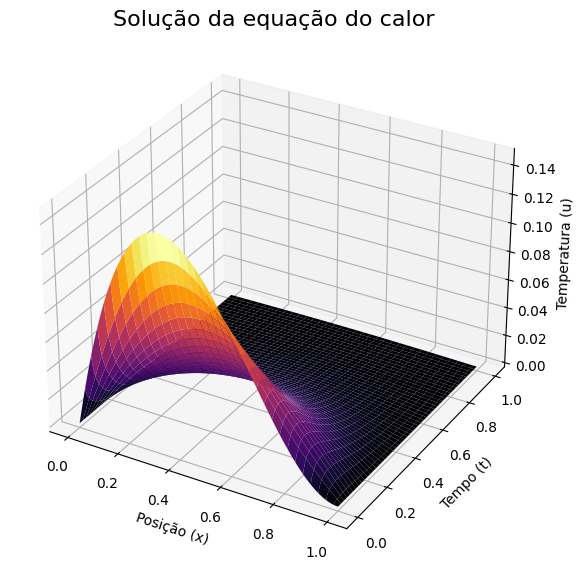

In [7]:
fig = plt.figure(figsize=(10, 7), dpi=100)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, T, u.T, cmap='inferno')
ax.set_xlabel('Posição (x)')
ax.set_ylabel('Tempo (t)')
ax.set_zlabel('Temperatura (u)')
plt.title('Solução da equação do calor', size = 16)
plt.savefig(r'imagens\calor.png', dpi = 200)

## Gerando animação:

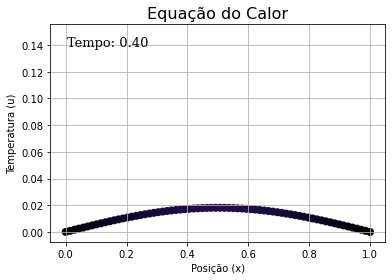

In [8]:
fig, ax = plt.subplots(1, 1)
ims = []
ax.set_xlabel('Posição (x)')
ax.set_ylabel('Temperatura (u)')
ax.set_title('Equação do Calor', fontsize = 16)

ax.grid('--')
u_min = np.min(u)
u_max = np.max(u)
for i in range(0, len(u[0, :]) -3000, 10):
    y = list(u[:, i])
    im = ax.scatter(x, y, c=y, cmap='inferno', linewidth=2, vmin=u_min, vmax=u_max)
    ims.append([im])
    time_label = ax.text(0.05, 0.9, f"Tempo: {i*Ht:.2f}", transform=ax.transAxes, color='black',fontfamily = 'serif', fontsize = 13 )
    ims[-1].append(time_label)

ani = animation.ArtistAnimation(fig, ims, interval=20, blit=True, repeat_delay=100)
writer = animation.PillowWriter(fps=15, bitrate=9000)
ani.save(r"imagens\calor_ani.png", writer=writer, dpi=200)